In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.models import Model

In [ ]:
# Set random seed for reproducibility
np.random.seed(1212)

# Load the datasets
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Prepare features and labels
df_features = df_train.iloc[:, 1:785]  # Features are the columns from index 1 to 785
df_label = df_train.iloc[:, 0]  # Labels are the first column (0)

# Prepare the test dataset
X_test = df_test.iloc[:, 0:784].values  # Features from test set (flattened)

# Split training data into train and validation sets
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, test_size=0.2, random_state=1212)

# Reshape the data to be 2D arrays (samples, features)
X_train = X_train.values.reshape(-1, 784)
X_cv = X_cv.values.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize the features (scale to range 0-1)
X_train = X_train.astype('float32') / 255.0
X_cv = X_cv.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [ ]:
# Input layer with reshape to 2D image
Inp = Input(shape=(784,))
x = Reshape((28, 28, 1))(Inp)

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Flatten for fully connected layers
x = Flatten()(x)

# Dense layers
x = Dense(300, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(200, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
output = Dense(num_digits, activation='softmax')(x)

# Create the model
model = Model(Inp, output)

In [ ]:
# Compile the model
learning_rate = 0.001  # Using a smaller learning rate for stability
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_cv, y_cv),
                    callbacks=[early_stopping])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       941,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022,326 (3.90 MB)

 Trainable params: 1,022,326 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1732801152.761068      93 service.cc:145] XLA service 0x7c3a58005e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732801152.761120      93 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1732801162.900918      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


336/336 - 14s - 41ms/step - accuracy: 0.8044 - loss: 0.5832 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 2/20
336/336 - 1s - 3ms/step - accuracy: 0.9599 - loss: 0.1469 - val_accuracy: 0.9827 - val_loss: 0.0647
Epoch 3/20
336/336 - 1s - 3ms/step - accuracy: 0.9713 - loss: 0.1080 - val_accuracy: 0.9863 - val_loss: 0.0502
Epoch 4/20
336/336 - 1s - 3ms/step - accuracy: 0.9779 - loss: 0.0836 - val_accuracy: 0.9869 - val_loss: 0.0484
Epoch 5/20
336/336 - 1s - 3ms/step - accuracy: 0.9813 - loss: 0.0700 - val_accuracy: 0.9874 - val_loss: 0.0453
Epoch 6/20
336/336 - 1s - 3ms/step - accuracy: 0.9827 - loss: 0.0686 - val_accuracy: 0.9881 - val_loss: 0.0439
Epoch 7/20
336/336 - 1s - 3ms/step - accuracy: 0.9844 - loss: 0.0585 - val_accuracy: 0.9873 - val_loss: 0.0495
Epoch 8/20
336/336 - 1s - 3ms/step - accuracy: 0.9861 - loss: 0.0516 - val_accuracy: 0.9907 - val_loss: 0.0391
Epoch 9/20
336/336 - 1s - 3ms/step - accuracy: 0.9868 - loss: 0.0491 - val_accuracy: 0.9899 - val_loss: 0.0442
Epoch 10/2

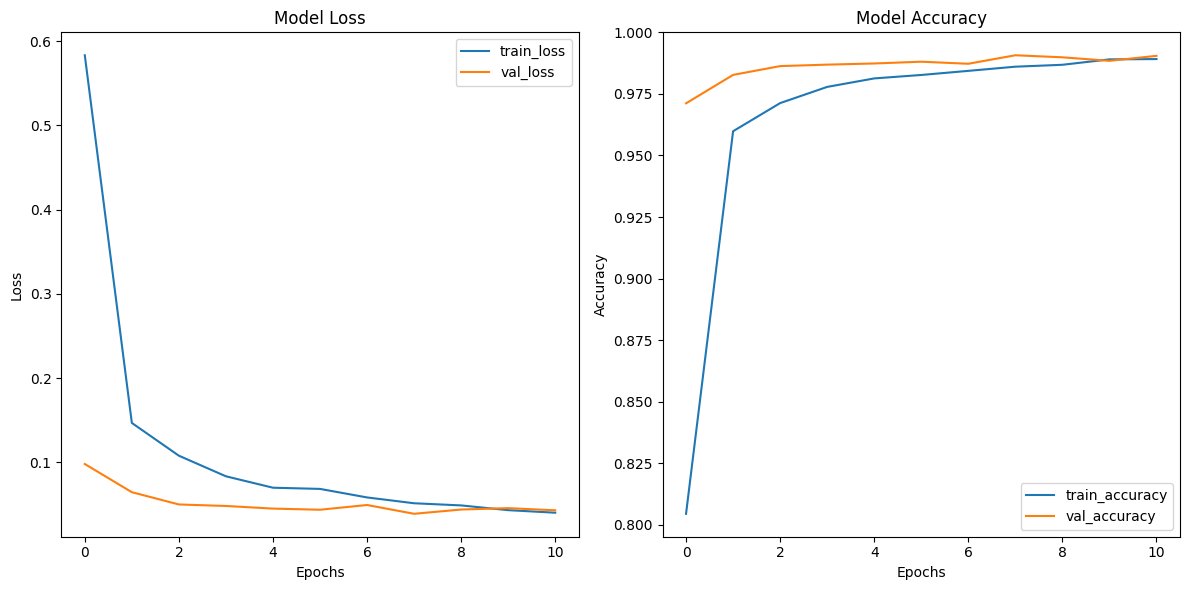

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


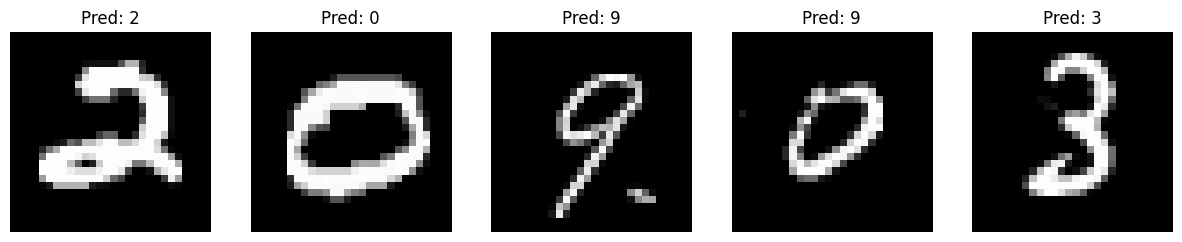

In [ ]:
# Display the first few rows of the test predictions
print(test_pred.head())

# Plot the first 5 test images and their predicted labels
def plot_test_predictions(X_test, predictions, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape for visualization
        plt.title(f'Pred: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Get the predicted labels from the submission DataFrame
predicted_labels = test_pred['Label'].values

# Visualize the first 5 predictions from the test set
plot_test_predictions(X_test, predicted_labels, n=5)
